In [1]:
import os
import csv
from scipy.io import loadmat
import mat73
import zipfile

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
# load file location
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_root = os.path.join(project_root, "data")

In [37]:
# use original data as input
with open(os.path.join(data_root, "data_model.csv"), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["mpa_uz", "elec_uz", "label"])
    for sample_name in os.listdir(os.path.join(data_root, "analysis")):
        mpa_uz_file = None
        elec_Iz_file = None
        for data_name in os.listdir(os.path.join(data_root, "analysis", sample_name)):
            data_desc = data_name.split(".")[0]
            data_name = os.path.join(data_root, "analysis", sample_name, data_name)
            
            try:
                data = loadmat(data_name)
            except:
                try:
                    data = mat73.loadmat(data_name)
                except:
                    print("data not read correctly")
                    print(data_name)
                    continue
                
            if data_desc[-3:].lower() == "mpa":
                data_mfp = data['mfp']
                
                data_uz = data['uz']
                data_uz = ~(data_uz == 0) # 1 for pore space and 0 for solid space
                data_uz = data_uz * 1.0
                label = data_uz.mean() # perm, a floating point number
                mpa_uz_file = os.path.join(data_root, "data_model", sample_name + "_" + data_desc + "_" + "mfp.npy")
                np.save(mpa_uz_file, data_mfp)
            else:
                data_Iz = data['Iz']
                elec_Iz_file = os.path.join(data_root, "data_model", sample_name + "_" + data_desc + "_" + "Iz.npy")                  
                np.save(elec_Iz_file, data_Iz)
            
            if mpa_uz_file and elec_Iz_file:
                writer.writerow([mpa_uz_file, elec_Iz_file, label])
            
csvfile.close()

data not read correctly
C:\Personal\MachineLearning\Project\Research\PoreFlow\data\analysis\344_04_256\P_2_MPa.mat
data not read correctly
C:\Personal\MachineLearning\Project\Research\PoreFlow\data\analysis\344_04_256\P_5_MPa.mat
data not read correctly
C:\Personal\MachineLearning\Project\Research\PoreFlow\data\analysis\344_05_256\P_10_MPa.mat
data not read correctly
C:\Personal\MachineLearning\Project\Research\PoreFlow\data\analysis\344_05_256\P_1_MPa.mat
data not read correctly
C:\Personal\MachineLearning\Project\Research\PoreFlow\data\analysis\374_10_02_256\P_10_MPa.mat


In [ ]:
# use processed data as input
# use original data as input
with open(os.path.join(data_root, "data_model_processed.csv"), 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["mpa_uz", "elec_uz", "label"])
    for sample_name in os.listdir(os.path.join(data_root, "analysis")):
        mpa_uz_file = None
        elec_Iz_file = None
        for data_name in os.listdir(os.path.join(data_root, "analysis", sample_name)):
            data_desc = data_name.split(".")[0]
            data_name = os.path.join(data_root, "analysis", sample_name, data_name)
            
            try:
                data = loadmat(data_name)
            except:
                try:
                    data = mat73.loadmat(data_name)
                except:
                    print("data not read correctly")
                    print(data_name)
                    continue
                
            if data_desc[-3:].lower() == "mpa":
                data_mfp = data['mfp']
                data_uz = data['uz']
                data_uz = ~(data_uz == 0) # 1 for pore space and 0 for solid space
                data_uz = data_uz * 1.0
                label = data_uz.mean() # perm, a floating point number
                mpa_uz_file = os.path.join(data_root, "data_model", sample_name + "_" + data_desc + "_" + "mfp.npy")
                np.save(mpa_uz_file, data_mfp)
            else:
                data_Iz = data['Iz']
                elec_Iz_file = os.path.join(data_root, "data_model", sample_name + "_" + data_desc + "_" + "Iz.npy")                  
                np.save(elec_Iz_file, data_Iz)
            
            if mpa_uz_file and elec_Iz_file:
                writer.writerow([mpa_uz_file, elec_Iz_file, label])
            
csvfile.close()

In [29]:
numpy_list = []
for numpy_data_name in os.listdir(os.path.join(data_root, "data_model")):
    numpy_list.append(numpy_data_name)

In [30]:
numpy_list.sort()

In [31]:
numpy_list

['10_01_256_10_01_256_elec_Iz.npy',
 '10_01_256_P_10_MPa_mfp.npy',
 '10_01_256_P_1_MPa_mfp.npy',
 '10_01_256_P_20_MPa_mfp.npy',
 '10_01_256_P_2_MPa_mfp.npy',
 '10_01_256_P_5_MPa_mfp.npy',
 '135_00_256_135_00_256_elec_Iz.npy',
 '135_00_256_P_10_MPa_mfp.npy',
 '135_00_256_P_1_MPa_mfp.npy',
 '135_00_256_P_20_MPa_mfp.npy',
 '135_00_256_P_2_MPa_mfp.npy',
 '135_00_256_P_5_MPa_mfp.npy',
 '135_02_256_135_02_256_elec_Iz.npy',
 '135_02_256_P_10_MPa_mfp.npy',
 '135_02_256_P_1_MPa_mfp.npy',
 '135_02_256_P_20_MPa_mfp.npy',
 '135_02_256_P_5_MPa_mfp.npy',
 '135_03_256_135_03_256_elec_Iz.npy',
 '135_03_256_P_10_MPa_mfp.npy',
 '135_03_256_P_1_MPa_mfp.npy',
 '135_03_256_P_20_MPa_mfp.npy',
 '135_03_256_P_5_MPa_mfp.npy',
 '135_04_256_135_04_256_elec_Iz.npy',
 '135_04_256_P_1_MPa_mfp.npy',
 '135_04_256_P_20_MPa_mfp.npy',
 '135_04_256_P_2_MPa_mfp.npy',
 '135_04_256_P_5_MPa_mfp.npy',
 '16_01_256_16_01_256_elec_Iz.npy',
 '16_01_256_P_10_MPa_mfp.npy',
 '16_01_256_P_1_MPa_mfp.npy',
 '16_01_256_P_20_MPa_mfp.npy'

### Cross Section of mfp and elec

In [72]:
mat_data_name = os.path.join(data_root, "analysis", "374_01_07_256")
M = loadmat(os.path.join(mat_data_name, "P_20_MPa.mat"))
print(M.keys())
print(M['mfp'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'ux', 'uy', 'uz', 'rho', 'mfp'])
(256, 256, 256)


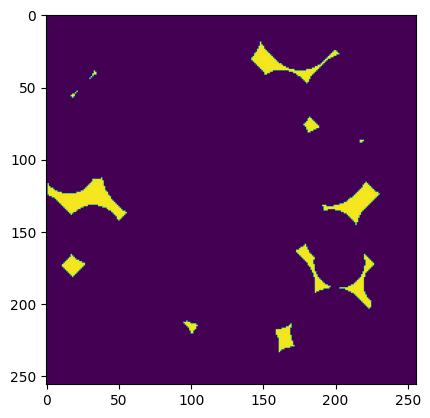

In [73]:
plt.imshow(M['mfp'][:, :, 0])

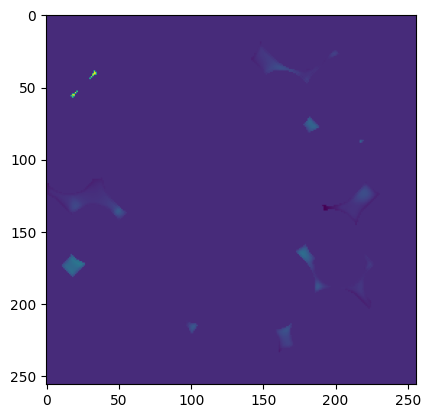

In [74]:
plt.imshow(M['uz'][:, :, 0])

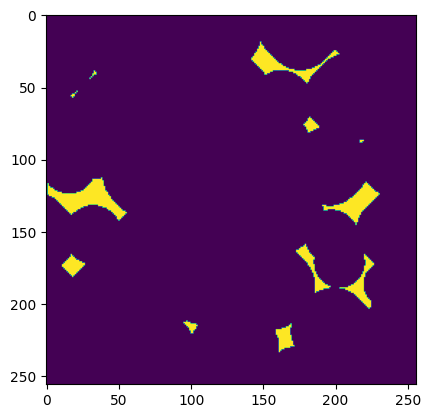

In [75]:
data_uz = M['uz'].copy()
data_uz = ~(data_uz == 0) # 1 for pore space and 0 for solid space
data_uz = data_uz * 1.0
plt.imshow(data_uz[:, :, 0])

In [76]:
mat_data_name = os.path.join(data_root, "analysis", "374_01_07_256")
E = mat73.loadmat(os.path.join(mat_data_name, "374_01_07_256_elec.mat"))
print(E.keys())
print(E['phi'].shape)

dict_keys(['Ix', 'Iy', 'Iz', 'phi'])
(256, 256, 256)


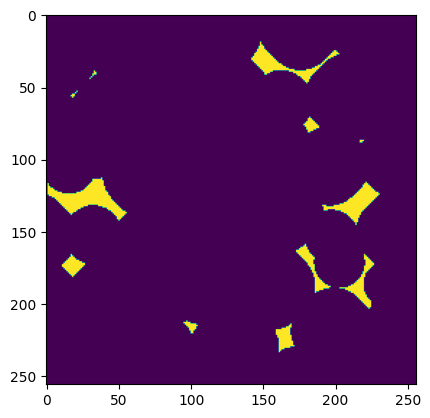

In [77]:
plt.imshow(E['phi'][:, :, 0])

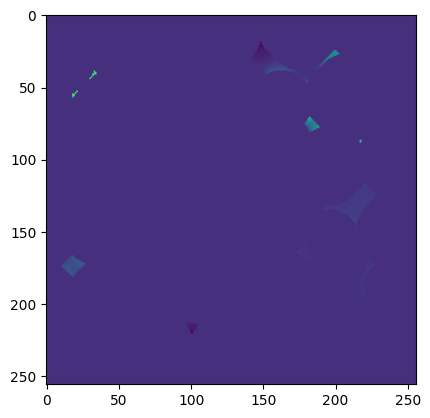

In [78]:
plt.imshow(E['Iz'][:, :, 0])

In [79]:
mat_data_name = os.path.join(data_root, "analysis", "72_02_256")
M = loadmat(os.path.join(mat_data_name, "P_20_MPa.mat"))
print(M.keys())
print(M['mfp'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'ux', 'uy', 'uz', 'rho', 'mfp'])
(256, 256, 256)


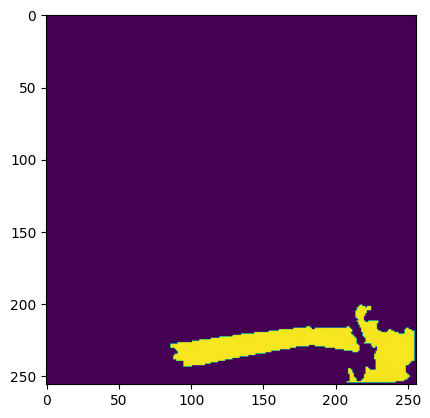

In [80]:
plt.imshow(M['mfp'][:, :, 0])

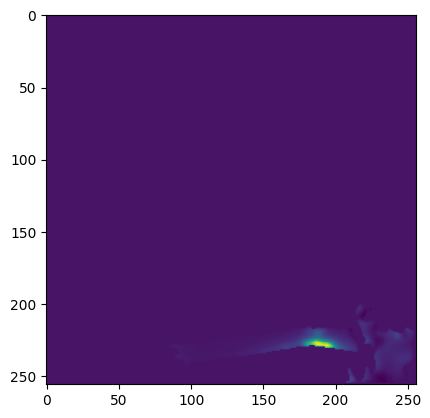

In [81]:
plt.imshow(M['uz'][:, :, 0])

In [40]:
mat_data_name = os.path.join(data_root, "analysis", "72_02_256")
E = mat73.loadmat(os.path.join(mat_data_name, "72_02_256_elec.mat"))
print(E.keys())
print(E['phi'].shape)

dict_keys(['Ix', 'Iy', 'Iz', 'phi'])
(256, 256, 256)


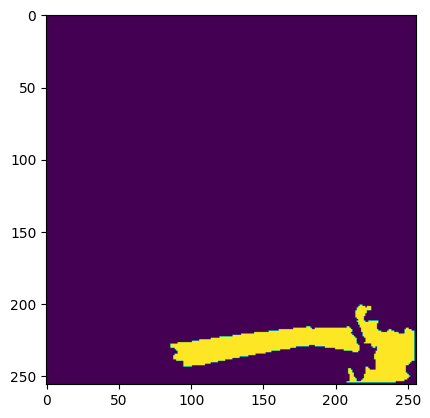

In [41]:
plt.imshow(E['phi'][:, :, 0])

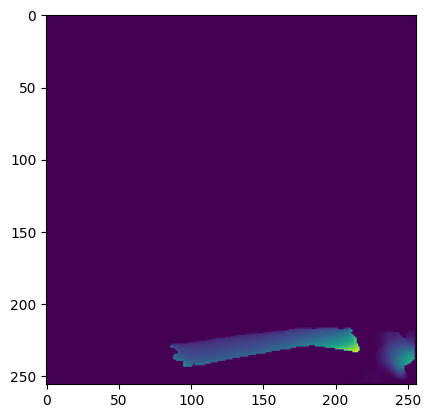

In [42]:
plt.imshow(E['Iz'][:, :, 0])

In [3]:
npy_data = np.load(os.path.join(data_root, "data_model", "10_01_256_P_1_MPa_mfp.npy"))

In [6]:
data = npy_data[:, :, 0]

In [9]:
(data < 1).sum()

65536